In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Загрузите прилагающийся датасет credit_data.
---

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data for ML projects/credit_data.csv', delimiter=',')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
print(data.isna().sum())

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


In [ ]:
target = data['Risk']
data = data.drop(['Risk','Unnamed: 0', 'Purpose'], axis=1)

Проверьте датасет на наличие текстовых атрибутов. Замените текстовые атрибуты на числовые без потери качества данных.
---

In [ ]:
#data['Saving accounts'] = data['Saving accounts'].map({"little":1,"moderate":2,"quite rich":3 ,"rich":4 });
#data['Checking account'] = data['Checking account'].map({"little":1,"moderate":2,"rich":3 });
target = target.map({"good":1,"bad":0});
data['Saving accounts'] = data['Saving accounts'].fillna(0)
data['Checking account'] = data['Checking account'].fillna(0)

In [ ]:
new_data = pd.get_dummies(data)
new_data.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_0,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_0,Checking account_little,Checking account_moderate,Checking account_rich
0,67,2,1169,6,0,1,0,1,0,1,0,0,0,0,0,1,0,0
1,22,2,5951,48,1,0,0,1,0,0,1,0,0,0,0,0,1,0
2,49,1,2096,12,0,1,0,1,0,0,1,0,0,0,1,0,0,0
3,45,2,7882,42,0,1,1,0,0,0,1,0,0,0,0,1,0,0
4,53,2,4870,24,0,1,1,0,0,0,1,0,0,0,0,1,0,0


Выведите информацию о количественных параметрах датасета;
---

In [ ]:
new_data[['Age', 'Job', 'Credit amount']].describe()

,Age,Job,Credit amount
count,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000
std,11.375469,0.653614,2822.736876
min,19.000000,0.000000,250.000000
25%,27.000000,2.000000,1365.500000
50%,33.000000,2.000000,2319.500000
75%,42.000000,2.000000,3972.250000
max,75.000000,3.000000,18424.000000


Разделите эти данные на тестовую и обучающую выборки;
---

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.2, random_state=42)

Обучите модель случайных лесов на обучающей выборке. Проверьте точность предсказаний.
---

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=new_data.columns).sort_values(ascending=False)
feature_imp

Credit amount                 0.251805
Age                           0.202834
Duration                      0.170023
Job                           0.065917
Checking account_0            0.061325
Checking account_little       0.039009
Saving accounts_little        0.025419
Housing_own                   0.024471
Checking account_moderate     0.020569
Saving accounts_0             0.020163
Sex_female                    0.019953
Sex_male                      0.018813
Housing_free                  0.015811
Saving accounts_moderate      0.015672
Housing_rent                  0.014775
Saving accounts_quite rich    0.012974
Saving accounts_rich          0.010628
Checking account_rich         0.009841
dtype: float64

Оцените полученную модель с помощью метрик.
---

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.76


In [ ]:
class_names = new_data.columns.tolist()
class_names

['Age',
 'Job',
 'Credit amount',
 'Duration',
 'Sex_female',
 'Sex_male',
 'Housing_free',
 'Housing_own',
 'Housing_rent',
 'Saving accounts_0',
 'Saving accounts_little',
 'Saving accounts_moderate',
 'Saving accounts_quite rich',
 'Saving accounts_rich',
 'Checking account_0',
 'Checking account_little',
 'Checking account_moderate',
 'Checking account_rich']

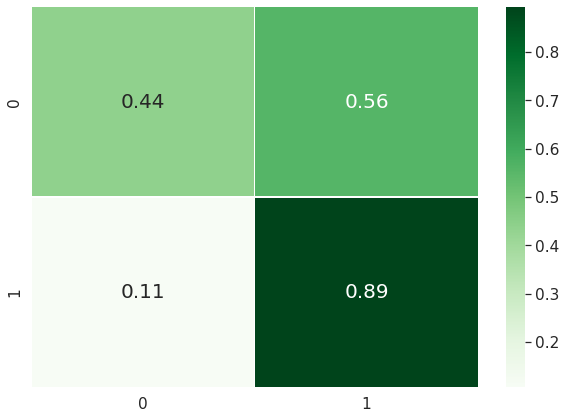

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Greens, linewidths=0.2)

Понизьте размерность данных с помощью метода главных компонент.
---

In [ ]:
from sklearn.cluster import KMeans;
from sklearn.decomposition import PCA;
from sklearn.preprocessing import normalize;
y = KMeans().fit_predict(new_data)
X = normalize(new_data);
x_PCA = PCA(n_components=2).fit_transform(X,2);
print(x_PCA.shape)

(1000, 2)


<Figure size 432x288 with 0 Axes>

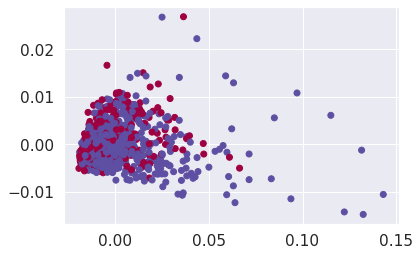

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(x_PCA[:,0], x_PCA[:,1], c=target, cmap='Spectral')
plt.figure()

Обучите заново модель случайных лесов и оцените ее эффективность с помощью метрик.
---

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_PCA, target, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.69


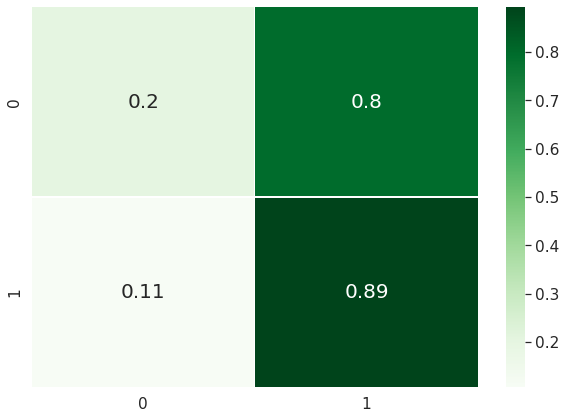

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Greens, linewidths=0.2)

Постройте график зависимости точности модели от размерности данных.
---

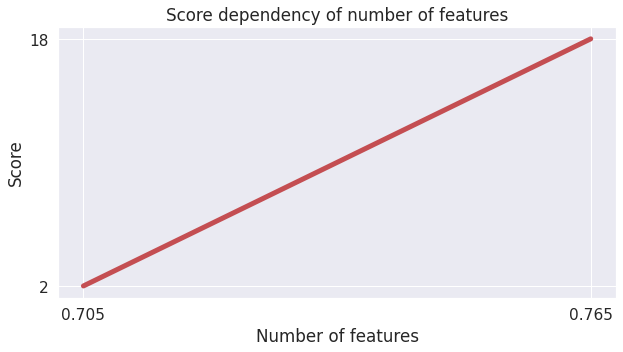

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot([0.765, 0.705], [18, 2], c='r', linewidth=5)
ax.set_xticks([0.765, 0.705])
ax.set_yticks([18, 2])
ax.set_xlabel('Number of features')
ax.set_ylabel('Score')
ax.set_title('Score dependency of number of features')
None

In [ ]:
res = []
for i in range(2, 18):
  y = KMeans().fit_predict(new_data)
  X = normalize(new_data);
  x_PCA = PCA(n_components=i).fit_transform(X,i);
  
  X_train, X_test, y_train, y_test = train_test_split(x_PCA, target, test_size=0.2, random_state=42)
  clf = RandomForestClassifier()
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  res.append(accuracy_score(y_test, y_pred))

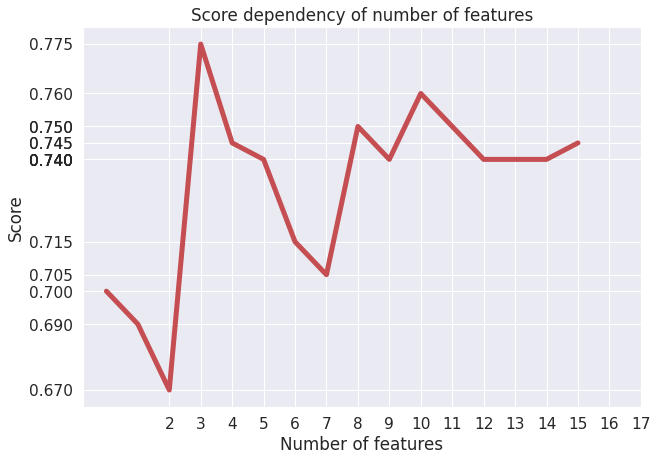

In [ ]:
ticks = [i for i in range(2, 18)]

fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(res, c='r', linewidth=5)
ax.set_xticks(ticks)
ax.set_yticks(res)
ax.set_xlabel('Number of features')
ax.set_ylabel('Score')
ax.set_title('Score dependency of number of features')
None

Best score reaches when number of features is equal 3

Сделайте вывод о применимости модели.
---

Basic score is equal 0.760 and best score for PCA model is equal to 0.775 when number of features is equal to 3. It is means that PCA model can be implemented, but basic model need to be upgraded due to bad score at basic configuration.
---